##Set Up

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import Counter

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### fn = food network
#### epi = epicurious
#### allrecipes.com

In [3]:
fn_filepath = '/content/drive/My Drive/Colab Notebooks/Capstone/EDA/recipes_raw_nosource_fn.json'
epi_filepath = '/content/drive/My Drive/Colab Notebooks/Capstone/EDA/recipes_raw_nosource_epi.json'
ar_filepath = '/content/drive/My Drive/Colab Notebooks/Capstone/EDA/recipes_raw_nosource_ar.json'

In [4]:
import json

# Step 1: Load the JSON file
# If you uploaded the file directly
with open(fn_filepath) as fn:
    data_fn = json.load(fn)
with open(epi_filepath) as epi:
    data_epi = json.load(epi)
with open(ar_filepath) as ar:
    data_ar = json.load(ar)

# If accessing from Google Drive, use:
# with open('/content/drive/My Drive/your_file.json') as f:
#     data = json.load(f)

# Step 2: Transform the data into a DataFrame
# Convert the dictionary to a list of dictionaries
recipes_fn = []
for key, value in data_fn.items():
    # Check if the required keys exist in the dictionary
    if 'title' in value and 'ingredients' in value and 'instructions' in value and 'picture_link' in value :
        recipe_fn = {
            'id': key,
            'title': value['title'],
            'ingredients': value['ingredients'],
            'instructions': value['instructions'],
            'picture_link': value['picture_link']
        }
        recipes_fn.append(recipe_fn)
recipes_epi = []
for key, value in data_fn.items():
    # Check if the required keys exist in the dictionary
    if 'title' in value and 'ingredients' in value and 'instructions' in value and 'picture_link' in value :
        recipe_epi = {
            'id': key,
            'title': value['title'],
            'ingredients': value['ingredients'],
            'instructions': value['instructions'],
            'picture_link': value['picture_link']
        }
        recipes_epi.append(recipe_epi)

recipes_ar = []
for key, value in data_ar.items():
  if 'title' in value and 'ingredients' in value and 'instructions' in value and 'picture_link' in value :
    recipe_ar = {
        'id': key,
        'title': value['title'],
        'ingredients': value['ingredients'],
        'instructions': value['instructions'],
        'picture_link': value['picture_link']
    }
    recipes_ar.append(recipe_ar)
# Step 3: Create the DataFrame
df_fn = pd.DataFrame(recipes_fn)
df_epi = pd.DataFrame(recipes_epi)
df_ar = pd.DataFrame(recipes_ar)
# Step 4: Display the DataFrame
df_fn.head()
df_epi.head()
df_ar.head()


,id,title,ingredients,instructions,picture_link
0,rmK12Uau.ntP510KeImX506H6Mr6jTu,Slow Cooker Chicken and Dumplings,"[4 skinless, boneless chicken breast halves AD...","Place the chicken, butter, soup, and onion in ...",55lznCYBbs2mT8BTx6BTkLhynGHzM.S
1,5ZpZE8hSVdPk2ZXo1mZTyoPWJRSCPSm,Awesome Slow Cooker Pot Roast,[2 (10.75 ounce) cans condensed cream of mushr...,"In a slow cooker, mix cream of mushroom soup, ...",QyrvGdGNMBA2lDdciY0FjKu.77MM0Oe
2,clyYQv.CplpwJtjNaFGhx0VilNYqRxu,Brown Sugar Meatloaf,"[1/2 cup packed brown sugar ADVERTISEMENT, 1/2...",Preheat oven to 350 degrees F (175 degrees C)....,LVW1DI0vtlCrpAhNSEQysE9i/7rJG56
3,BmqFAmCrDHiKNwX.IQzb0U/v0mLlxFu,Best Chocolate Chip Cookies,"[1 cup butter, softened ADVERTISEMENT, 1 cup w...",Preheat oven to 350 degrees F (175 degrees C)....,0SO5kdWOV94j6EfAVwMMYRM3yNN8eRi
4,N.jCksRjB4MFwbgPFQU8Kg.yF.XCtOi,Homemade Mac and Cheese Casserole,[8 ounces whole wheat rotini pasta ADVERTISEME...,Preheat oven to 350 degrees F. Line a 2-quart ...,YCnbhplMgiraW4rUXcybgSEZinSgljm


In [5]:
df = pd.concat([df_fn, df_epi, df_ar], ignore_index=True)
df.head()

,id,title,ingredients,instructions,picture_link
0,p3pKOD6jIHEcjf20CCXohP8uqkG5dGi,Grammie Hamblet's Deviled Crab,"[1/2 cup celery, finely chopped, 1 small green...",Toss ingredients lightly and spoon into a butt...,None
1,S7aeOIrsrgT0jLP32jKGg4j.o9zi2DO,Infineon Raceway Baked Beans,"[2 pounds skirt steak, cut into 1/2-inch dice,...",Watch how to make this recipe.\nSprinkle the s...,Ja5uaD8Q7m7vvtWwk2.48dr1eCre/qi
2,o9MItV9txfoPsUQ4v8b0vh1.VdjwfsK,Southwestern Black Bean Dip,"[1 1/2 cups dried black beans, picked over and...","In a large saucepan, let the beans soak in eno...",None
3,5l1yTSYFifF/M2dfbD6DX28WWQpLWNK,Sour Cream Noodle Bake,"[1 1/4 pounds ground chuck, One 15-ounce can t...",Watch how to make this recipe.\nPreheat the ov...,nm/WxalB.VjEZSa0iX9RuZ8xI51Y7bS
4,kRBQSWtqYWqtkb34FGeenBSbC32gIdO,Sushi Renovation,"[1 cup rice, brown, medium-grain, cooked, 1/2-...",Special equipment: sushi mat\nCook the brown r...,None


## Quick Facts

In [6]:
num_rows = len(df)
print(f"Number of recipe: {num_rows}")


Number of recipe: 159126


In [7]:
unique_values = df['title'].unique()
print("Number of Unique Recipe Titles: ", len(unique_values))


Number of Unique Recipe Titles:  89915


In [8]:
duplicate_example = df[df['title'].duplicated(keep='first')].iloc[0]

duplicate_example


,894
id,amkxfl5yLtgvpoe77IOdEy5Kag4n8eK
title,Tomatillo Salsa
ingredients,[]
instructions,"Broil 20 husked and rinsed tomatillos, 1 slice..."
picture_link,KD7co2PNbwmZJ8tUxXowjO.dQ9/ZeRC


In [9]:
dupicate_1 = df[df['title']=='Tomatillo Salsa']

dupicate_1


,id,title,ingredients,instructions,picture_link
825,JfaxApjbTgSk4MhAOxHg0FvO/JxopPi,Tomatillo Salsa,"[1/2 pound tomatillos, husked, washed and cut ...","Place the tomatillos, jalapenos and water in a...",None
894,amkxfl5yLtgvpoe77IOdEy5Kag4n8eK,Tomatillo Salsa,[],"Broil 20 husked and rinsed tomatillos, 1 slice...",KD7co2PNbwmZJ8tUxXowjO.dQ9/ZeRC
7945,UZxiuTrQkMuYIwFMMMUWUcuEsGHEr72,Tomatillo Salsa,"[1 pound fresh tomatillos, 1 large Spanish oni...",Watch how to make this recipe.\nPull the husks...,Vu8DMMftHuWtOdvuJGIypBWqzZNQ0aO
38569,4hDmGAUjuV1.lwj8Lywqp2WZTQmfQVC,Tomatillo Salsa,"[1 pound tomatillos, husked, washed and cut in...","Place the tomatillos, jalapenos and water in a...",None
60627,JfaxApjbTgSk4MhAOxHg0FvO/JxopPi,Tomatillo Salsa,"[1/2 pound tomatillos, husked, washed and cut ...","Place the tomatillos, jalapenos and water in a...",None
60696,amkxfl5yLtgvpoe77IOdEy5Kag4n8eK,Tomatillo Salsa,[],"Broil 20 husked and rinsed tomatillos, 1 slice...",KD7co2PNbwmZJ8tUxXowjO.dQ9/ZeRC
67747,UZxiuTrQkMuYIwFMMMUWUcuEsGHEr72,Tomatillo Salsa,"[1 pound fresh tomatillos, 1 large Spanish oni...",Watch how to make this recipe.\nPull the husks...,Vu8DMMftHuWtOdvuJGIypBWqzZNQ0aO
98371,4hDmGAUjuV1.lwj8Lywqp2WZTQmfQVC,Tomatillo Salsa,"[1 pound tomatillos, husked, washed and cut in...","Place the tomatillos, jalapenos and water in a...",None


## Checking for missing data


Completeness of Data:
Evaluate how complete the data is, especially in terms of critical fields like ingredients and instructions, and the impact of missing data on dataset.

              missing_count  missing_percentage
picture_link          57700           36.260573
instructions            348            0.218695
title                   104            0.065357


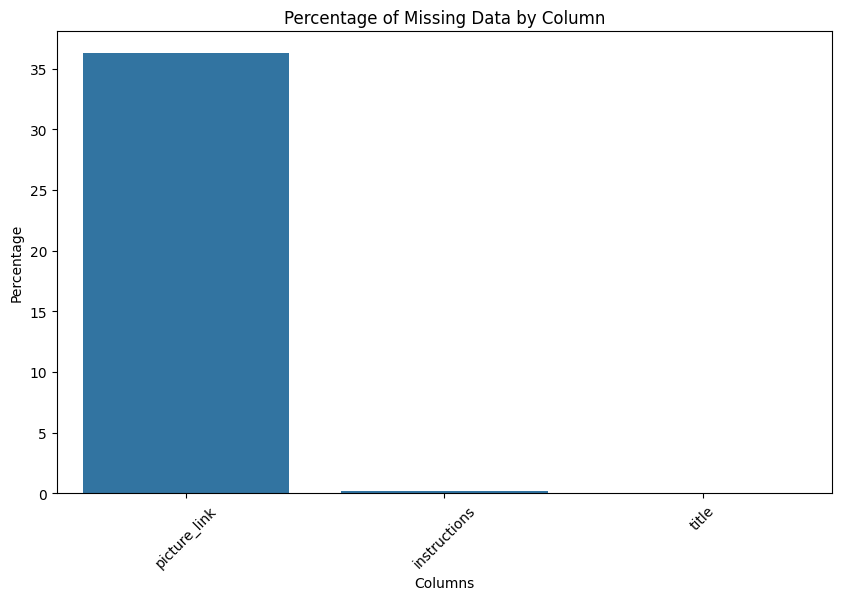

In [10]:
# Calculate the number of missing values in each column
missing_data = df.isnull().sum()

# Calculate the percentage of missing data in each column
missing_percentage = (missing_data / len(df)) * 100

# Create a DataFrame to display the count and percentage of missing data for each column
missing_df = pd.DataFrame({
    'missing_count': missing_data,
    'missing_percentage': missing_percentage
})

# Filter out columns that have no missing data
missing_df = missing_df[missing_df['missing_count'] > 0]

# Sort the DataFrame by the percentage of missing data in descending order
missing_df.sort_values(by='missing_percentage', ascending=False, inplace=True)

# Display the DataFrame
print(missing_df)

# Optionally, visualize the missing data
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(x=missing_df.index, y=missing_df['missing_percentage'])
plt.title('Percentage of Missing Data by Column')
plt.ylabel('Percentage')
plt.xlabel('Columns')
plt.xticks(rotation=45)
plt.show()


## Checking for some common allergens

In [11]:
meat_items = [
    "beef", "chicken", "pork", "lamb", "turkey", "duck", "veal", "bacon",
    "ham", "sausage", "salami", "jerky", "fish", "shrimp", "crab", "lobster",
    "goat", "rabbit", "venison", "kebab", "mutton", "chorizo", "pâté",
    "chicken breast", "ground beef", "ribs", "steak", "filet mignon", "tenderloin"
]

dairy_items = [
    "whole milk", "skim milk", "almond milk", "soy milk",
    "cheese", "yogurt", "greek yogurt", "flavored yogurt",
    "dairy-free yogurt", "unsalted butter", "salted butter",
    "ghee", "heavy cream", "whipping cream", "sour cream",
    "crème fraîche", "regular ice cream", "gelato",
    "soft serve", "sweetened condensed milk",
    "evaporated milk", "buttermilk", "custard", "ricotta cheese", "chocolate"
]

seafood_items = [
    "fish",
    "shrimp",
    "crab",
    "lobster",
    "scallops",
    "clams",
    "mussels",
    "oysters",
    "sardines",
    "anchovies",
    "tuna",
    "salmon",
    "trout",
    "halibut",
    "cod",
    "tilapia",
    "catfish",
    "squid",
    "octopus",
    "crawfish",
    "sea bass",
    "pollock",
    "hake",
    "snapper",
    "rockfish",
    "mackerel",
    "perch"
]

nuts = [
    "almonds",
    "cashews",
    "walnuts",
    "pecans",
    "hazelnuts",
    "pistachios",
    "macadamia nuts",
    "brazil nuts",
    "pine nuts",
    "chestnuts",
    "macadamia nuts",
    "peanuts"
]

gluten_items = [
    "bread",
    "pasta",
    "cereal",
    "crackers",
    "beer",
    "seitan",
    "breaded foods",
    "soy sauce",
    "some sauces and dressings"
]
soy_foods = [
    "tofu",
    "soy sauce",
    "edamame",
    "tempeh",
    "miso",
    "soy milk",
    "soy nuts",
    "protein bars"
]

wheat_foods = [
    "bread",
    "pasta",
    "cereal",
    "cookies",
    "cakes",
    "crackers",
    "beer",
    "bulgur",
    "wheat germ"
]

celery = ["celery"]


In [12]:
def is_non_vegetarian(ingredients):
    # Check if ingredients is a list
    if isinstance(ingredients, list):
        # Join the list elements into a single string
        ingredients = ' '.join(ingredients).lower()
    else:
        ingredients = ingredients.lower()
    return any(meat in ingredients for meat in meat_items)

def is_dairy(ingredients):
    # Check if ingredients is a list
    if isinstance(ingredients, list):
        # Join the list elements into a single string
        ingredients = ' '.join(ingredients).lower()
    else:
        ingredients = ingredients.lower()
    return any(dairy in ingredients for dairy in dairy_items)

def is_seafood(ingredients):
    # Check if ingredients is a list
    if isinstance(ingredients, list):
        # Join the list elements into a single string
        ingredients = ' '.join(ingredients).lower()
    else:
        ingredients = ingredients.lower()
    return any(seafood in ingredients for seafood in seafood_items)

def is_nuts(ingredients):
    # Check if ingredients is a list
    if isinstance(ingredients, list):
        # Join the list elements into a single string
        ingredients = ' '.join(ingredients).lower()
    else:
        ingredients = ingredients.lower()
    return any(nut in ingredients for nut in nuts)
def is_gluten(ingredients):
    # Check if ingredients is a list
    if isinstance(ingredients, list):
        # Join the list elements into a single string
        ingredients = ' '.join(ingredients).lower()
    else:
        ingredients = ingredients.lower()
    return any(gluten in ingredients for gluten in gluten_items)

def is_soy(ingredients):
    # Check if ingredients is a list
    if isinstance(ingredients, list):
        # Join the list elements into a single string
        ingredients = ' '.join(ingredients).lower()
    else:
        ingredients = ingredients.lower()
    return any(soy in ingredients for soy in soy_foods)

def is_wheat(ingredients):
    # Check if ingredients is a list
    if isinstance(ingredients, list):
        # Join the list elements into a single string
        ingredients = ' '.join(ingredients).lower()
    else:
        ingredients = ingredients
    return any(wheat in ingredients for wheat in wheat_foods)

def is_celery(ingredients):
    # Check if ingredients is a list
    if isinstance(ingredients, list):
        # Join the list elements into a single string
        ingredients = ' '.join(ingredients).lower()
    else:
        ingredients = ingredients.lower()
    return any(celery in ingredients for celery in celery)

df['non_vegetarian'] = df['ingredients'].apply(is_non_vegetarian)
df['dairy'] = df['ingredients'].apply(is_dairy)
df['seafood'] = df['ingredients'].apply(is_seafood)
df['nuts'] = df['ingredients'].apply(is_nuts)
df['gluten'] = df['ingredients'].apply(is_gluten)
df['soy'] = df['ingredients'].apply(is_soy)
df['wheat'] = df['ingredients'].apply(is_wheat)
df['celery'] = df['ingredients'].apply(is_celery)

# Display the updated DataFrame
df.head()


,id,title,ingredients,instructions,picture_link,non_vegetarian,dairy,seafood,nuts,gluten,soy,wheat,celery
0,p3pKOD6jIHEcjf20CCXohP8uqkG5dGi,Grammie Hamblet's Deviled Crab,"[1/2 cup celery, finely chopped, 1 small green...",Toss ingredients lightly and spoon into a butt...,None,True,True,True,False,False,False,False,True
1,S7aeOIrsrgT0jLP32jKGg4j.o9zi2DO,Infineon Raceway Baked Beans,"[2 pounds skirt steak, cut into 1/2-inch dice,...",Watch how to make this recipe.\nSprinkle the s...,Ja5uaD8Q7m7vvtWwk2.48dr1eCre/qi,True,False,False,False,True,True,True,False
2,o9MItV9txfoPsUQ4v8b0vh1.VdjwfsK,Southwestern Black Bean Dip,"[1 1/2 cups dried black beans, picked over and...","In a large saucepan, let the beans soak in eno...",None,False,True,False,False,False,False,False,False
3,5l1yTSYFifF/M2dfbD6DX28WWQpLWNK,Sour Cream Noodle Bake,"[1 1/4 pounds ground chuck, One 15-ounce can t...",Watch how to make this recipe.\nPreheat the ov...,nm/WxalB.VjEZSa0iX9RuZ8xI51Y7bS,False,True,False,False,True,False,True,False
4,kRBQSWtqYWqtkb34FGeenBSbC32gIdO,Sushi Renovation,"[1 cup rice, brown, medium-grain, cooked, 1/2-...",Special equipment: sushi mat\nCook the brown r...,None,False,False,True,False,False,False,False,False


In [13]:
df['ingredients'][1]


['2 pounds skirt steak, cut into 1/2-inch dice',
 'Kosher salt and fresh cracked black pepper',
 '4 to 6 slices thick-cut applewood smoked bacon, 1/4-inch diced (about 1 cup)',
 '1 1/2 cups 1/4-inch diced red onion',
 '1/2 cup seeded and finely diced jalapenos (2 medium)',
 '3 tablespoons minced garlic',
 '1 teaspoon kosher salt',
 '2 teaspoons fresh cracked black pepper',
 'Apple cider vinegar, best quality',
 '1 (15-ounce) can cannellini beans, with liquid',
 '1 (15-ounce) can lima beans, with liquid',
 '1 (15-ounce) can kidney beans, with liquid',
 '1/3 cup molasses',
 '2 tablespoons dark brown sugar',
 '3 tablespoons soy sauce',
 '1/3 cup ketchup',
 'Crusty bread, for serving']

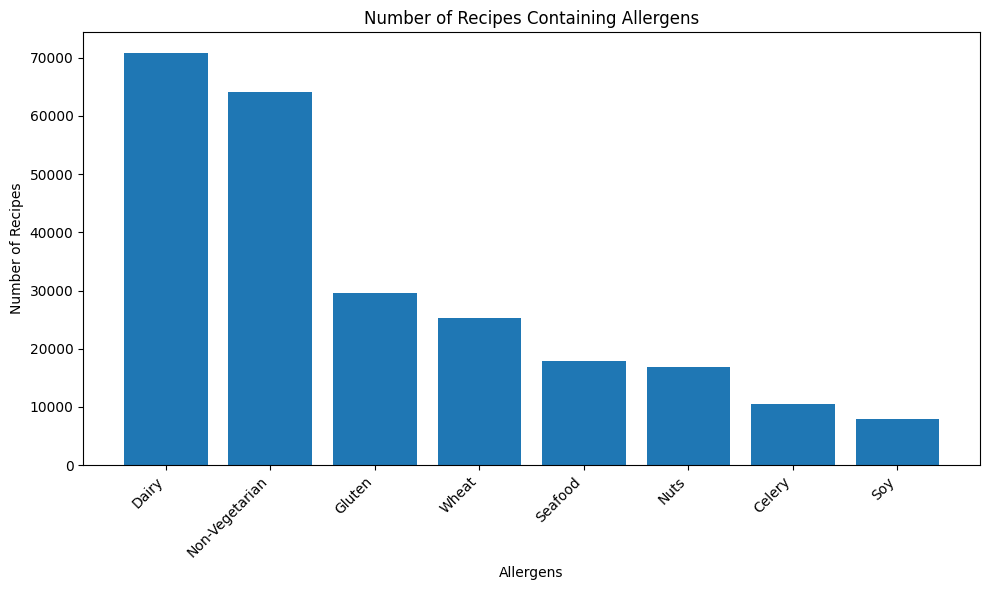

In [14]:
# prompt: create a bar graph of number of rows of data where non_vegetarion ='True', dairy = 'True', seafood = 'True', nuts = 'True', gluten = 'True', soy = 'True', wheat = 'True'

import matplotlib.pyplot as plt

# Create a dictionary to store the counts for each allergen
allergen_counts = {
    'Non-Vegetarian': df['non_vegetarian'].sum(),
    'Dairy': df['dairy'].sum(),
    'Seafood': df['seafood'].sum(),
    'Nuts': df['nuts'].sum(),
    'Gluten': df['gluten'].sum(),
    'Soy': df['soy'].sum(),
    'Wheat': df['wheat'].sum(),
    'Celery': df['celery'].sum()
}

allergen_counts = dict(sorted(allergen_counts.items(), key=lambda item: item[1], reverse=True))

# Extract the allergen names and counts for the bar graph
allergen_names = list(allergen_counts.keys())
counts = list(allergen_counts.values())

# Create the bar graph
plt.figure(figsize=(10, 6))
plt.bar(allergen_names, counts)
plt.xlabel('Allergens')
plt.ylabel('Number of Recipes')
plt.title('Number of Recipes Containing Allergens')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


In [15]:
#the values of the bar graph
allergen_counts


{'Dairy': 70825,
 'Non-Vegetarian': 64196,
 'Gluten': 29507,
 'Wheat': 25224,
 'Seafood': 17956,
 'Nuts': 16824,
 'Celery': 10483,
 'Soy': 7867}

In [16]:
allergen_df = pd.DataFrame(allergen_counts.items(), columns=['Allergen', 'Count'])

total = len(df)
allergen_df['Percentage'] = (allergen_df['Count'] / total) * 100

allergen_df


,Allergen,Count,Percentage
0,Dairy,70825,44.508754
1,Non-Vegetarian,64196,40.342873
2,Gluten,29507,18.543167
3,Wheat,25224,15.851589
4,Seafood,17956,11.284140
5,Nuts,16824,10.572754
6,Celery,10483,6.587861
7,Soy,7867,4.943881


### Ingredient Frequency Analysis

Common Ingredients: Identify the most frequently used ingredients across all recipes. This can help in understanding the basic components of most dishes and identifying potential allergens not explicitly categorized.

Rare Ingredients: Highlight rare or unique ingredients that could be of interest to niche dietary needs or preferences.

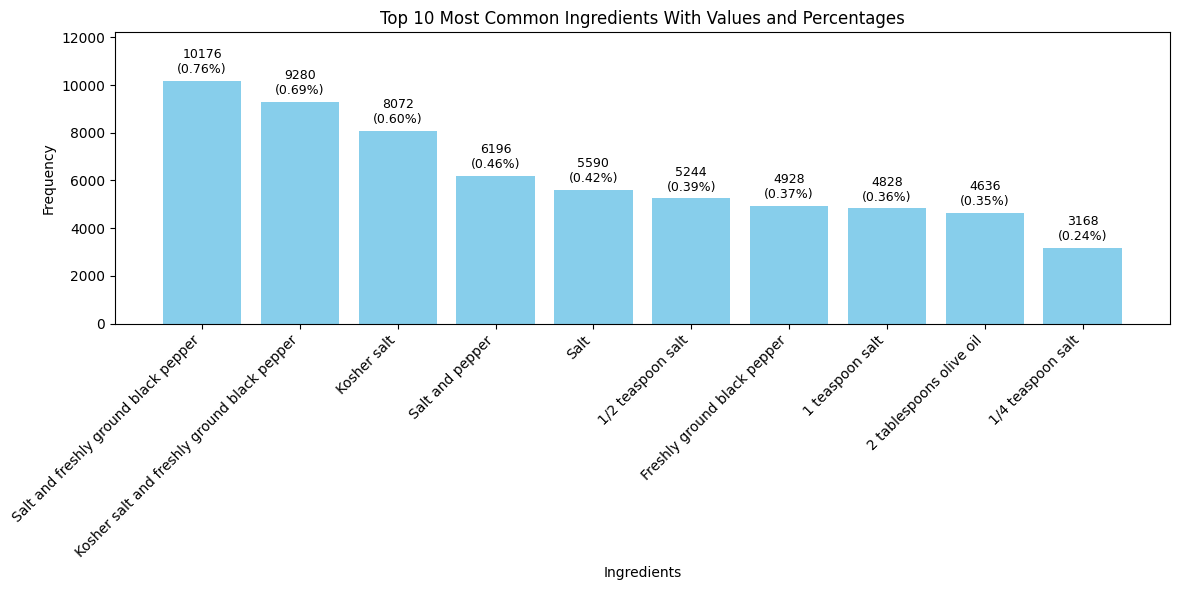

Total unique ingredients: 260914


In [17]:
# Step 1: Clean 'ADVERTISEMENT' and exclude null or empty ingredients
def clean_ingredients(ingredients):
    if isinstance(ingredients, list):
        # Remove "ADVERTISEMENT" and filter out empty ingredient strings
        cleaned = [ingredient for ingredient in ingredients if "ADVERTISEMENT" not in ingredient and ingredient]
        return cleaned if len(cleaned) > 0 else None  # Return None if the list becomes empty
    return None  # Return None if it's not a valid list of ingredients

# Step 2: Apply the cleaning function to the 'ingredients' column and filter out nulls
df['cleaned_ingredients'] = df['ingredients'].apply(clean_ingredients)

# Step 3: Exclude recipes with null or empty ingredient lists after cleaning
df_filtered = df[df['cleaned_ingredients'].notnull()]

# Step 4: Flatten the cleaned ingredients for all recipes into a single list
all_ingredients = [ingredient for ingredient_list in df_filtered['cleaned_ingredients'] for ingredient in ingredient_list]

# Step 5: Count the frequency of each ingredient (only cleaned ingredients)
ingredient_counts = Counter(all_ingredients)

# Step 6: Get the most common and least common ingredients
most_common = ingredient_counts.most_common(10)
least_common = ingredient_counts.most_common()[:-11:-1]

# Calculate the total number of ingredient mentions
total_ingredients = sum(ingredient_counts.values())

# Get the most common ingredients and calculate their percentages
most_common_with_percents = [(ingredient, count, count / total_ingredients * 100) for ingredient, count in most_common]

# Step 7: Plot the most common ingredients with percentages
def plot_ingredient_counts(ingredient_data, title):
    ingredients, counts, percents = zip(*ingredient_data)  # Unzip the tuples into three lists
    plt.figure(figsize=(12, 6))
    bars = plt.bar(ingredients, counts, color='skyblue')
    plt.xlabel('Ingredients')
    plt.ylabel('Frequency')
    plt.title(title)
    plt.xticks(rotation=45, ha='right')

    # Increase the upper limit of the y-axis to make room for labels
    highest_value = max(counts)
    extra_space = highest_value * 0.2  # 20% extra space
    plt.ylim(0, highest_value + extra_space)

    # Add text labels on top of each bar
    for bar, percent in zip(bars, percents):
        yval = bar.get_height()
        text = f'{int(yval)}\n({percent:.2f}%)'
        plt.text(bar.get_x() + bar.get_width()/2, yval + extra_space * 0.1, text, va='bottom', ha='center', fontsize=9)

    plt.tight_layout()
    plt.show()

# Call the function to plot most common ingredients with values and percentages on top
plot_ingredient_counts(most_common_with_percents, 'Top 10 Most Common Ingredients With Values and Percentages')

# Step 8: Print the total number of unique ingredients (after cleaning)
total_unique_ingredients = len(ingredient_counts)
print(f"Total unique ingredients: {total_unique_ingredients}")


### Recipe Complexity.

Ingredient Count: Analyze the distribution of the number of ingredients per recipe. This can give insights into recipe complexity and number of of ingredients. Unfortunatley, we do not get any information related to preparation time (and calries information as well).

Instruction Length: Measure the length of the instructions as a proxy for cooking difficulty or time required.

Steps for Recipe Complexity Analysis
1. Number of Ingredients:
We will compute the number of ingredients for each recipe and plot the distribution. This will give us insights into how ingredient count varies across recipes and help identify particularly simple or complex recipes.

2. Length of Instructions:
We'll also analyze the length of the recipe instructions (in terms of word count) to gauge how detailed the instructions are.

In [18]:
# Print the column names of the original DataFrame
print(df.columns)


Index(['id', 'title', 'ingredients', 'instructions', 'picture_link',
       'non_vegetarian', 'dairy', 'seafood', 'nuts', 'gluten', 'soy', 'wheat',
       'celery', 'cleaned_ingredients'],
      dtype='object')


In [19]:
# Print the column names of the filtered DataFrame
print(df_filtered.columns)


Index(['id', 'title', 'ingredients', 'instructions', 'picture_link',
       'non_vegetarian', 'dairy', 'seafood', 'nuts', 'gluten', 'soy', 'wheat',
       'celery', 'cleaned_ingredients'],
      dtype='object')


<ipython-input-20-ce984b964f03>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['num_ingredients'] = df_filtered['cleaned_ingredients'].apply(len)
<ipython-input-20-ce984b964f03>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['instruction_length'] = df_filtered['instructions'].apply(lambda x: len(str(x).split()))


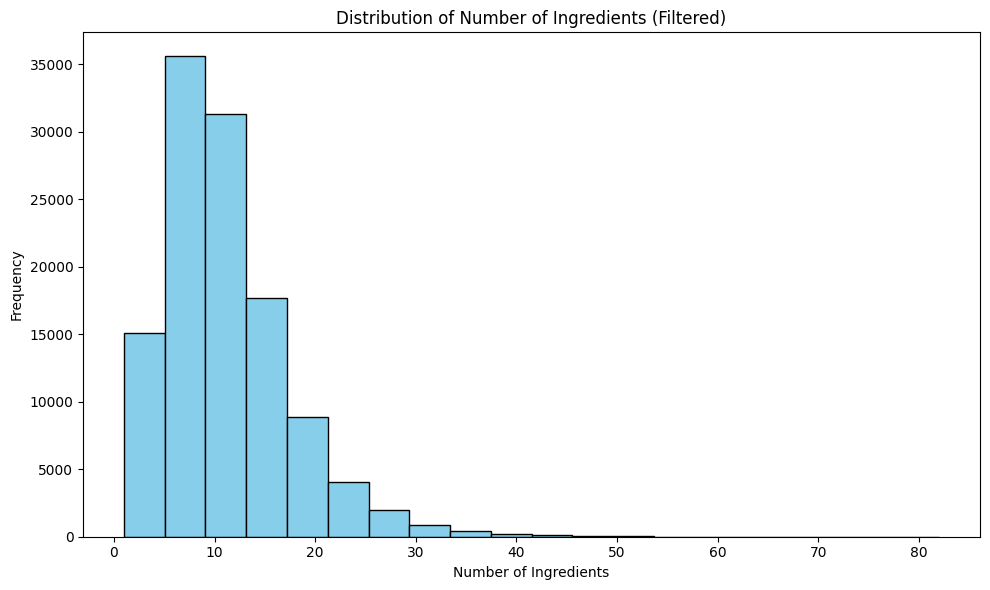

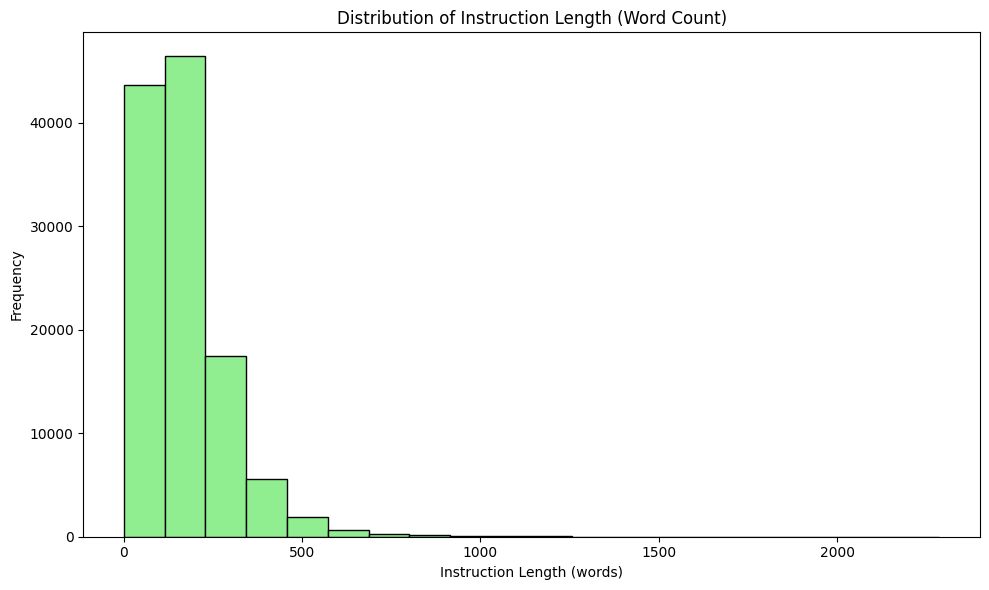

       num_ingredients  instruction_length
count     116350.00000       116350.000000
mean          11.50483          169.395024
std            6.22516          122.405216
min            1.00000            1.000000
25%            7.00000           87.000000
50%           10.00000          145.000000
75%           14.00000          219.000000
max           82.00000         2286.000000
Most complex recipes:
                                                    title  num_ingredients  \
34178   Eggplant Lasagna with Marinated Red Pepper and...               82   
93980   Eggplant Lasagna with Marinated Red Pepper and...               82   
54069                                     Pizza Four Ways               78   
113871                                    Pizza Four Ways               78   
9666                    Rebuilt Louisiana Seafood Platter               76   

        instruction_length  
34178                 1147  
93980                 1147  
54069                  649  
113871

In [20]:
# Step 1: Calculate the number of ingredients for each recipe (after cleaning)
df_filtered['num_ingredients'] = df_filtered['cleaned_ingredients'].apply(len)

# Step 2: Calculate the length of instructions (in words) for each recipe
df_filtered['instruction_length'] = df_filtered['instructions'].apply(lambda x: len(str(x).split()))

# Step 3: Plot the distribution of number of ingredients (after cleaning)
plt.figure(figsize=(10, 6))
plt.hist(df_filtered['num_ingredients'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Number of Ingredients (Filtered)')
plt.xlabel('Number of Ingredients')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Step 4: Plot the distribution of instruction length (in words)
plt.figure(figsize=(10, 6))
plt.hist(df_filtered['instruction_length'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Distribution of Instruction Length (Word Count)')
plt.xlabel('Instruction Length (words)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Step 5: Display basic statistics for recipe complexity (after cleaning)
complexity_stats = df_filtered[['num_ingredients', 'instruction_length']].describe()
print(complexity_stats)

# Step 6: Additional: You can also check the most complex recipes
most_complex_recipes = df_filtered.sort_values(by=['num_ingredients', 'instruction_length'], ascending=False).head()
print("Most complex recipes:")
print(most_complex_recipes[['title', 'num_ingredients', 'instruction_length']])


The discrepancy between the number of unique ingredients (260,914) and the number of ingredients in the dataset (from the recipe complexity analysis) arises from the fact that these two metrics represent different concepts:

1. Total Unique Ingredients (260,914):

This number represents the total distinct ingredient entries across all recipes. It means that there are 260,914 different ingredient names used across all recipes, but many of these may appear multiple times across different recipes.

For example, "salt", "pepper", or "olive oil" might appear in thousands of recipes, but they are counted only once as unique ingredients.

2. Number of Ingredients per Recipe (from Recipe Complexity):

The number of ingredients shown in the recipe complexity analysis (the num_ingredients column) refers to the number of ingredients per recipe.
In this case, the total number of recipes is 116,350, and you are analyzing how many ingredients are used in each recipe.

The summary statistics for this analysis show that on average, each recipe contains around 11.5 ingredients (mean), but individual recipes can have anywhere between 1 and 82 ingredients.

To Summarize the Difference:

Total unique ingredients (260,914): This represents the total number of different ingredient names (e.g., "salt", "butter", "chicken", etc.) used across all recipes, regardless of how many times they appear.

Number of ingredients per recipe: This is calculated per recipe (i.e., how many ingredients are used in each recipe), and we are looking at the distribution of this number across all recipes.

Why Do the Numbers Differ?

The total unique ingredients (260,914) are calculated from the entire dataset, counting each distinct ingredient only once, no matter how many times it appears across different recipes.

The number of ingredients per recipe is a measure of complexity for each individual recipe and varies from one recipe to another. For example, one recipe may have 10 ingredients, and another may have 20, but some of the ingredients may overlap (e.g., both may contain "salt").

Example:

If Recipe 1 has: ["salt", "pepper", "olive oil"]

If Recipe 2 has: ["salt", "chicken", "garlic", "olive oil"]

There are 5 unique ingredients across the two recipes, but Recipe 1 has 3 ingredients and Recipe 2 has 4 ingredients.

#### Recipe Complexity Insights - explanation

Here are some insights you can derive based on the existing analysis:

1. Number of Ingredients:

Mean (Average): Each recipe has around 11.5 ingredients on average.
Median: The median number of ingredients is 10, meaning that half of the recipes have 10 or fewer ingredients, which is a good benchmark for "simpler" recipes.
Outliers (Max Value): The most complex recipe contains 82 ingredients, which is an extreme outlier compared to the average recipe.

25th and 75th Percentiles:

25% of recipes have 7 ingredients or fewer, which can be considered "simple" recipes.

75% of recipes have 14 ingredients or fewer, meaning that recipes with more than 14 ingredients can be considered complex.

2. Instruction Length (Word Count):

Mean: The average instruction length is 169 words, indicating that, on average, recipes are moderately detailed.

Median (50th percentile): The median length is 145 words, meaning that half the recipes have instructions shorter than 145 words, which can indicate simpler instructions.

Max Value: The longest recipe instructions are 2,286 words long, which suggests a very detailed or multi-step recipe.

Outliers: Recipes with instruction lengths above 219 words (75th percentile) can be considered more detailed or complex.

3. Most Complex Recipes:

Looking at the most complex recipes based on the number of ingredients and instruction length:

Recipes like "Eggplant Lasagna with Marinated Red Pepper" and "Pizza Four Ways" have the highest number of ingredients (up to 82) and long instructions (1,147 and 649 words, respectively).

These are likely highly complex dishes involving many steps and ingredients.

### Let's categorizing Recipes by Complexity:
You could categorize recipes into simple, moderate, and complex by setting thresholds for the number of ingredients and instruction length.

For example:

Simple Recipes: Fewer than 8 ingredients, instruction length below 100 words.

Moderate Recipes: 8-14 ingredients, instruction length between 100-200 words.

Complex Recipes: More than 14 ingredients, instruction length above 200 words.

In [21]:
# Example categorization logic based on complexity
def categorize_recipe(row):
    if row['num_ingredients'] <= 7 and row['instruction_length'] <= 100:
        return 'Simple'
    elif 7 < row['num_ingredients'] <= 14 and 100 < row['instruction_length'] <= 200:
        return 'Moderate'
    else:
        return 'Complex'

# Apply categorization to the dataset
df_filtered['complexity_category'] = df_filtered.apply(categorize_recipe, axis=1)

# Display the distribution of recipes by complexity
print(df_filtered['complexity_category'].value_counts())


complexity_category
Complex     69079
Moderate    27136
Simple      20135
Name: count, dtype: int64


<ipython-input-21-6847cbe5f5d5>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['complexity_category'] = df_filtered.apply(categorize_recipe, axis=1)


We could categorize recipes into simple, moderate, and complex by setting thresholds for the number of ingredients and instruction length.

For example:

Simple Recipes: Fewer than 8 ingredients, instruction length below 100 words.

Moderate Recipes: 8-14 ingredients, instruction length between 100-200 words.

Complex Recipes: More than 14 ingredients, instruction length above 200 words.

In [22]:
# Example categorization logic based on complexity
def categorize_recipe(row):
    if row['num_ingredients'] <= 7 and row['instruction_length'] <= 100:
        return 'Simple'
    elif 7 < row['num_ingredients'] <= 14 and 100 < row['instruction_length'] <= 200:
        return 'Moderate'
    else:
        return 'Complex'

# Apply categorization to the dataset
df_filtered['complexity_category'] = df_filtered.apply(categorize_recipe, axis=1)

# Display the distribution of recipes by complexity
print(df_filtered['complexity_category'].value_counts())


complexity_category
Complex     69079
Moderate    27136
Simple      20135
Name: count, dtype: int64


<ipython-input-22-6847cbe5f5d5>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['complexity_category'] = df_filtered.apply(categorize_recipe, axis=1)


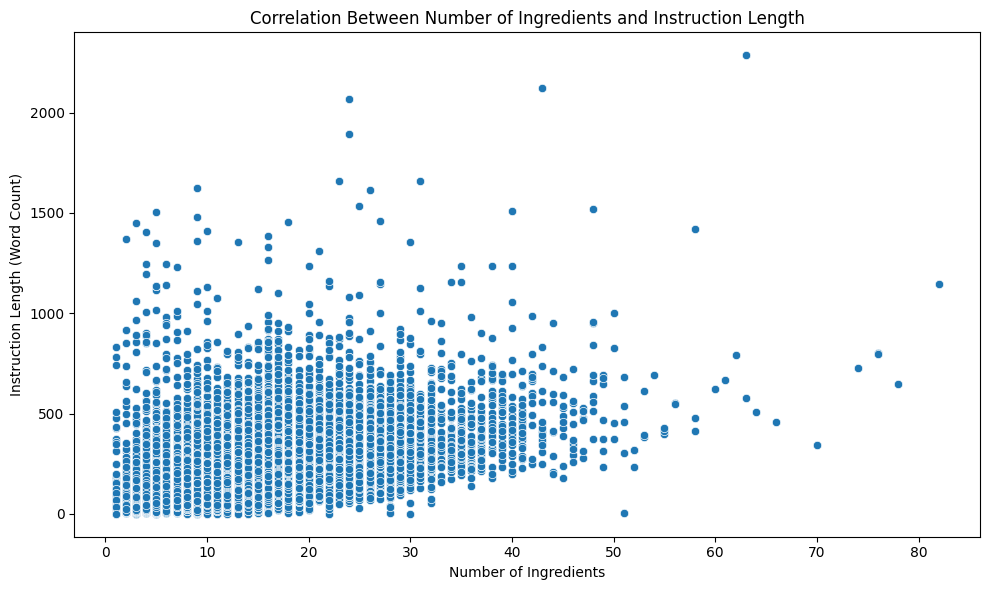

In [23]:
# Correlation Between Number of Ingredients and Instruction Length.
# We can explore if there's any correlation between the number of ingredients and the instruction length.

import seaborn as sns

# Plotting the correlation between number of ingredients and instruction length
plt.figure(figsize=(10, 6))
sns.scatterplot(x='num_ingredients', y='instruction_length', data=df_filtered)
plt.title('Correlation Between Number of Ingredients and Instruction Length')
plt.xlabel('Number of Ingredients')
plt.ylabel('Instruction Length (Word Count)')
plt.tight_layout()
plt.show()


**Insights from the Scatter Plot:**

General Trend:

As the number of ingredients increases, there is a slight increase in instruction length, but the relationship appears to be somewhat dispersed.
Recipes with around 10-20 ingredients seem to cluster with moderate instruction lengths (mostly under 500 words), suggesting a wide variation in complexity even for recipes with the same number of ingredients.

Outliers:

There are clear outliers where recipes with a relatively moderate number of ingredients (around 30-50) have extremely long instructions (over 1,000 words). These may represent intricate recipes with a lot of detailed steps despite having a moderate ingredient list.
Recipes with a large number of ingredients (40-80) seem to have more dispersed instruction lengths, but some recipes with many ingredients do not necessarily have long instructions.

Low Complexity Cluster:

Recipes with fewer than 10 ingredients are generally associated with shorter instructions, though there are exceptions. This suggests that simpler recipes (in terms of ingredients) tend to have more concise instructions.

***Possible Correlation:***

While there is a positive correlation between the number of ingredients and instruction length, the scatter plot suggests that the relationship is not perfectly linear—recipes with a similar number of ingredients can still have highly variable instruction lengths, meaning complexity isn't solely determined by the number of ingredients. Potentially cooking time? we do not have this information.

### Cuisine or Dish Type Analysis:

Cuisine Distribution: If possible, classify recipes by cuisine (Italian, Mexican, etc.) and perform a comparative analysis to see which cuisines tend to have more of certain allergens. Cannot be executed: missing label/column in df.

I then focusd on ***Dish Type:***
Categorize recipes by type (dessert, main course, appetizer) to analyze allergen prevalence by dish type.

In [24]:
# Keywords for dish types
dessert_keywords = [
    'cake', 'pie', 'dessert', 'cookie', 'pudding', 'sweet', 'mousse', 'tart', 'pastry', 'cupcake',
    'ice cream', 'sorbet', 'gelato', 'brownie', 'cheesecake', 'tiramisu', 'chocolate', 'fruit',
    'custard', 'crème brûlée', 'parfait', 'soufflé', 'sundae', 'cobbler', 'macaron', 'truffle'
]

main_course_keywords = [
    'steak', 'chicken', 'pasta', 'curry', 'stew', 'casserole', 'roast', 'pizza', 'burger', 'meatloaf',
    'fish', 'seafood', 'pork', 'lamb', 'beef', 'turkey', 'duck', 'vegetarian', 'vegan', 'tofu',
    'risotto', 'paella', 'lasagna', 'enchiladas', 'tacos', 'fajitas', 'stir-fry', 'kebab', 'sushi',
    'ramen', 'pho', 'gnocchi', 'quiche', 'frittata', 'omelet', 'burrito'
]

appetizer_keywords = [
    'appetizer', 'starter', 'dip', 'bruschetta', 'tapas', 'cheese', 'antipasto',
    'canapé', 'hors d\'oeuvre', 'amuse-bouche', 'crostini', 'finger food', 'meze',
    'nachos', 'wings', 'spring rolls', 'sushi rolls', 'deviled eggs', 'ceviche',
    'pâté', 'terrine', 'tartare', 'carpaccio', 'oysters', 'shrimp cocktail'
]

side_dish_keywords = [
    'salad', 'soup', 'fries', 'mashed potatoes', 'rice', 'vegetables', 'coleslaw',
    'bread', 'rolls', 'biscuits', 'corn', 'green beans', 'asparagus', 'broccoli',
    'cauliflower', 'brussels sprouts', 'carrots', 'sweet potato', 'quinoa', 'pilaf',
    'gratin', 'macaroni and cheese', 'stuffing', 'garlic bread', 'french fries',
    'roasted potatoes', 'totrilla', 'taco','onion rings'
]

beverage_keywords = [
    'water', 'soda', 'juice', 'tea', 'coffee', 'wine', 'beer', 'cocktail', 'smoothie',
    'milkshake', 'lemonade', 'iced tea', 'hot chocolate', 'espresso', 'cappuccino',
    'latte', 'mocktail', 'punch', 'cider', 'kombucha'
]

breakfast_keywords = [
    'eggs', 'bacon', 'pancakes', 'waffles', 'cereal', 'oatmeal', 'yogurt', 'granola',
    'toast', 'bagel', 'muffin', 'croissant', 'sausage', 'hash browns', 'french toast',
    'breakfast burrito', 'smoothie bowl', 'avocado toast', 'frittata', 'breakfast sandwich', 'milk', 'porridge', 'fruit'
]


# Categorization function
def categorize_by_dish_type(title):
    if title is None:
        return 'Other'  # Return 'Other' if the title is None
    title_lower = title.lower()
    if any(keyword in title_lower for keyword in dessert_keywords):
        return 'Dessert'
    elif any(keyword in title_lower for keyword in main_course_keywords):
        return 'Main Course'
    elif any(keyword in title_lower for keyword in appetizer_keywords):
        return 'Appetizer'
    elif any(keyword in title_lower for keyword in side_dish_keywords):
        return 'Side Dish'
    elif any(keyword in title_lower for keyword in beverage_keywords):
        return 'Beverage'
    elif any(keyword in title_lower for keyword in breakfast_keywords):
        return 'Breakfast'
    else:
        return 'Other'  # For titles that don't fit any category

# Apply the updated categorization function to the DataFrame
df['dish_type'] = df['title'].apply(categorize_by_dish_type)

# Example: Display the distribution of dish types
print(df['dish_type'].value_counts())

# Example: Show the first few rows to verify categories
print(df.head())


dish_type
Other          49611
Main Course    39295
Dessert        32580
Side Dish      21141
Appetizer       6921
Beverage        5167
Breakfast       4411
Name: count, dtype: int64
                                id                           title  \
0  p3pKOD6jIHEcjf20CCXohP8uqkG5dGi  Grammie Hamblet's Deviled Crab   
1  S7aeOIrsrgT0jLP32jKGg4j.o9zi2DO    Infineon Raceway Baked Beans   
2  o9MItV9txfoPsUQ4v8b0vh1.VdjwfsK     Southwestern Black Bean Dip   
3  5l1yTSYFifF/M2dfbD6DX28WWQpLWNK          Sour Cream Noodle Bake   
4  kRBQSWtqYWqtkb34FGeenBSbC32gIdO                Sushi Renovation   

                                         ingredients  \
0  [1/2 cup celery, finely chopped, 1 small green...   
1  [2 pounds skirt steak, cut into 1/2-inch dice,...   
2  [1 1/2 cups dried black beans, picked over and...   
3  [1 1/4 pounds ground chuck, One 15-ounce can t...   
4  [1 cup rice, brown, medium-grain, cooked, 1/2-...   

                                        instructions  \
0  

In [25]:
# Applying allergen detection functions
df['non_vegetarian'] = df['ingredients'].apply(is_non_vegetarian)
df['dairy'] = df['ingredients'].apply(is_dairy)
df['seafood'] = df['ingredients'].apply(is_seafood)
df['nuts'] = df['ingredients'].apply(is_nuts)
df['gluten'] = df['ingredients'].apply(is_gluten)
df['soy'] = df['ingredients'].apply(is_soy)
df['wheat'] = df['ingredients'].apply(is_wheat)
df['celery'] = df['ingredients'].apply(is_celery)

# Categorizing recipes by dish type
df['dish_type'] = df['title'].apply(categorize_by_dish_type)

# Displaying the first few rows to verify categories and allergen flags
#print(df.head())

# Displaying the distribution of dish types
#print(df['dish_type'].value_counts())

# Optionally, analyzing allergen prevalence by dish type
allergen_counts_by_dish_type = df.groupby('dish_type').agg({
    'non_vegetarian': 'mean',
    'dairy': 'mean',
    'seafood': 'mean',
    'nuts': 'mean',
    'gluten': 'mean',
    'soy': 'mean',
    'wheat': 'mean',
    'celery': 'mean'
}).multiply(100).round(2)  # Convert proportions to percentages

print(allergen_counts_by_dish_type)


             non_vegetarian  dairy  seafood   nuts  gluten   soy  wheat  \
dish_type                                                                 
Appetizer             39.56  71.29    14.62   7.83   28.80  3.99  25.86   
Beverage              14.90  24.68     9.15   3.15   11.46  2.59  10.76   
Breakfast             39.29  49.83     7.98  15.28   21.33  1.31  22.47   
Dessert               16.72  65.66     4.87  18.13   10.22  1.80  13.17   
Main Course           78.49  40.83    12.01   6.79   26.70  9.26  19.30   
Other                 30.61  34.64    14.91   9.06   17.34  4.30  14.50   
Side Dish             35.38  36.88    11.44  11.24   16.83  4.91  13.32   

             celery  
dish_type            
Appetizer      5.74  
Beverage       2.40  
Breakfast      2.81  
Dessert        2.37  
Main Course   10.06  
Other          5.32  
Side Dish     11.71  


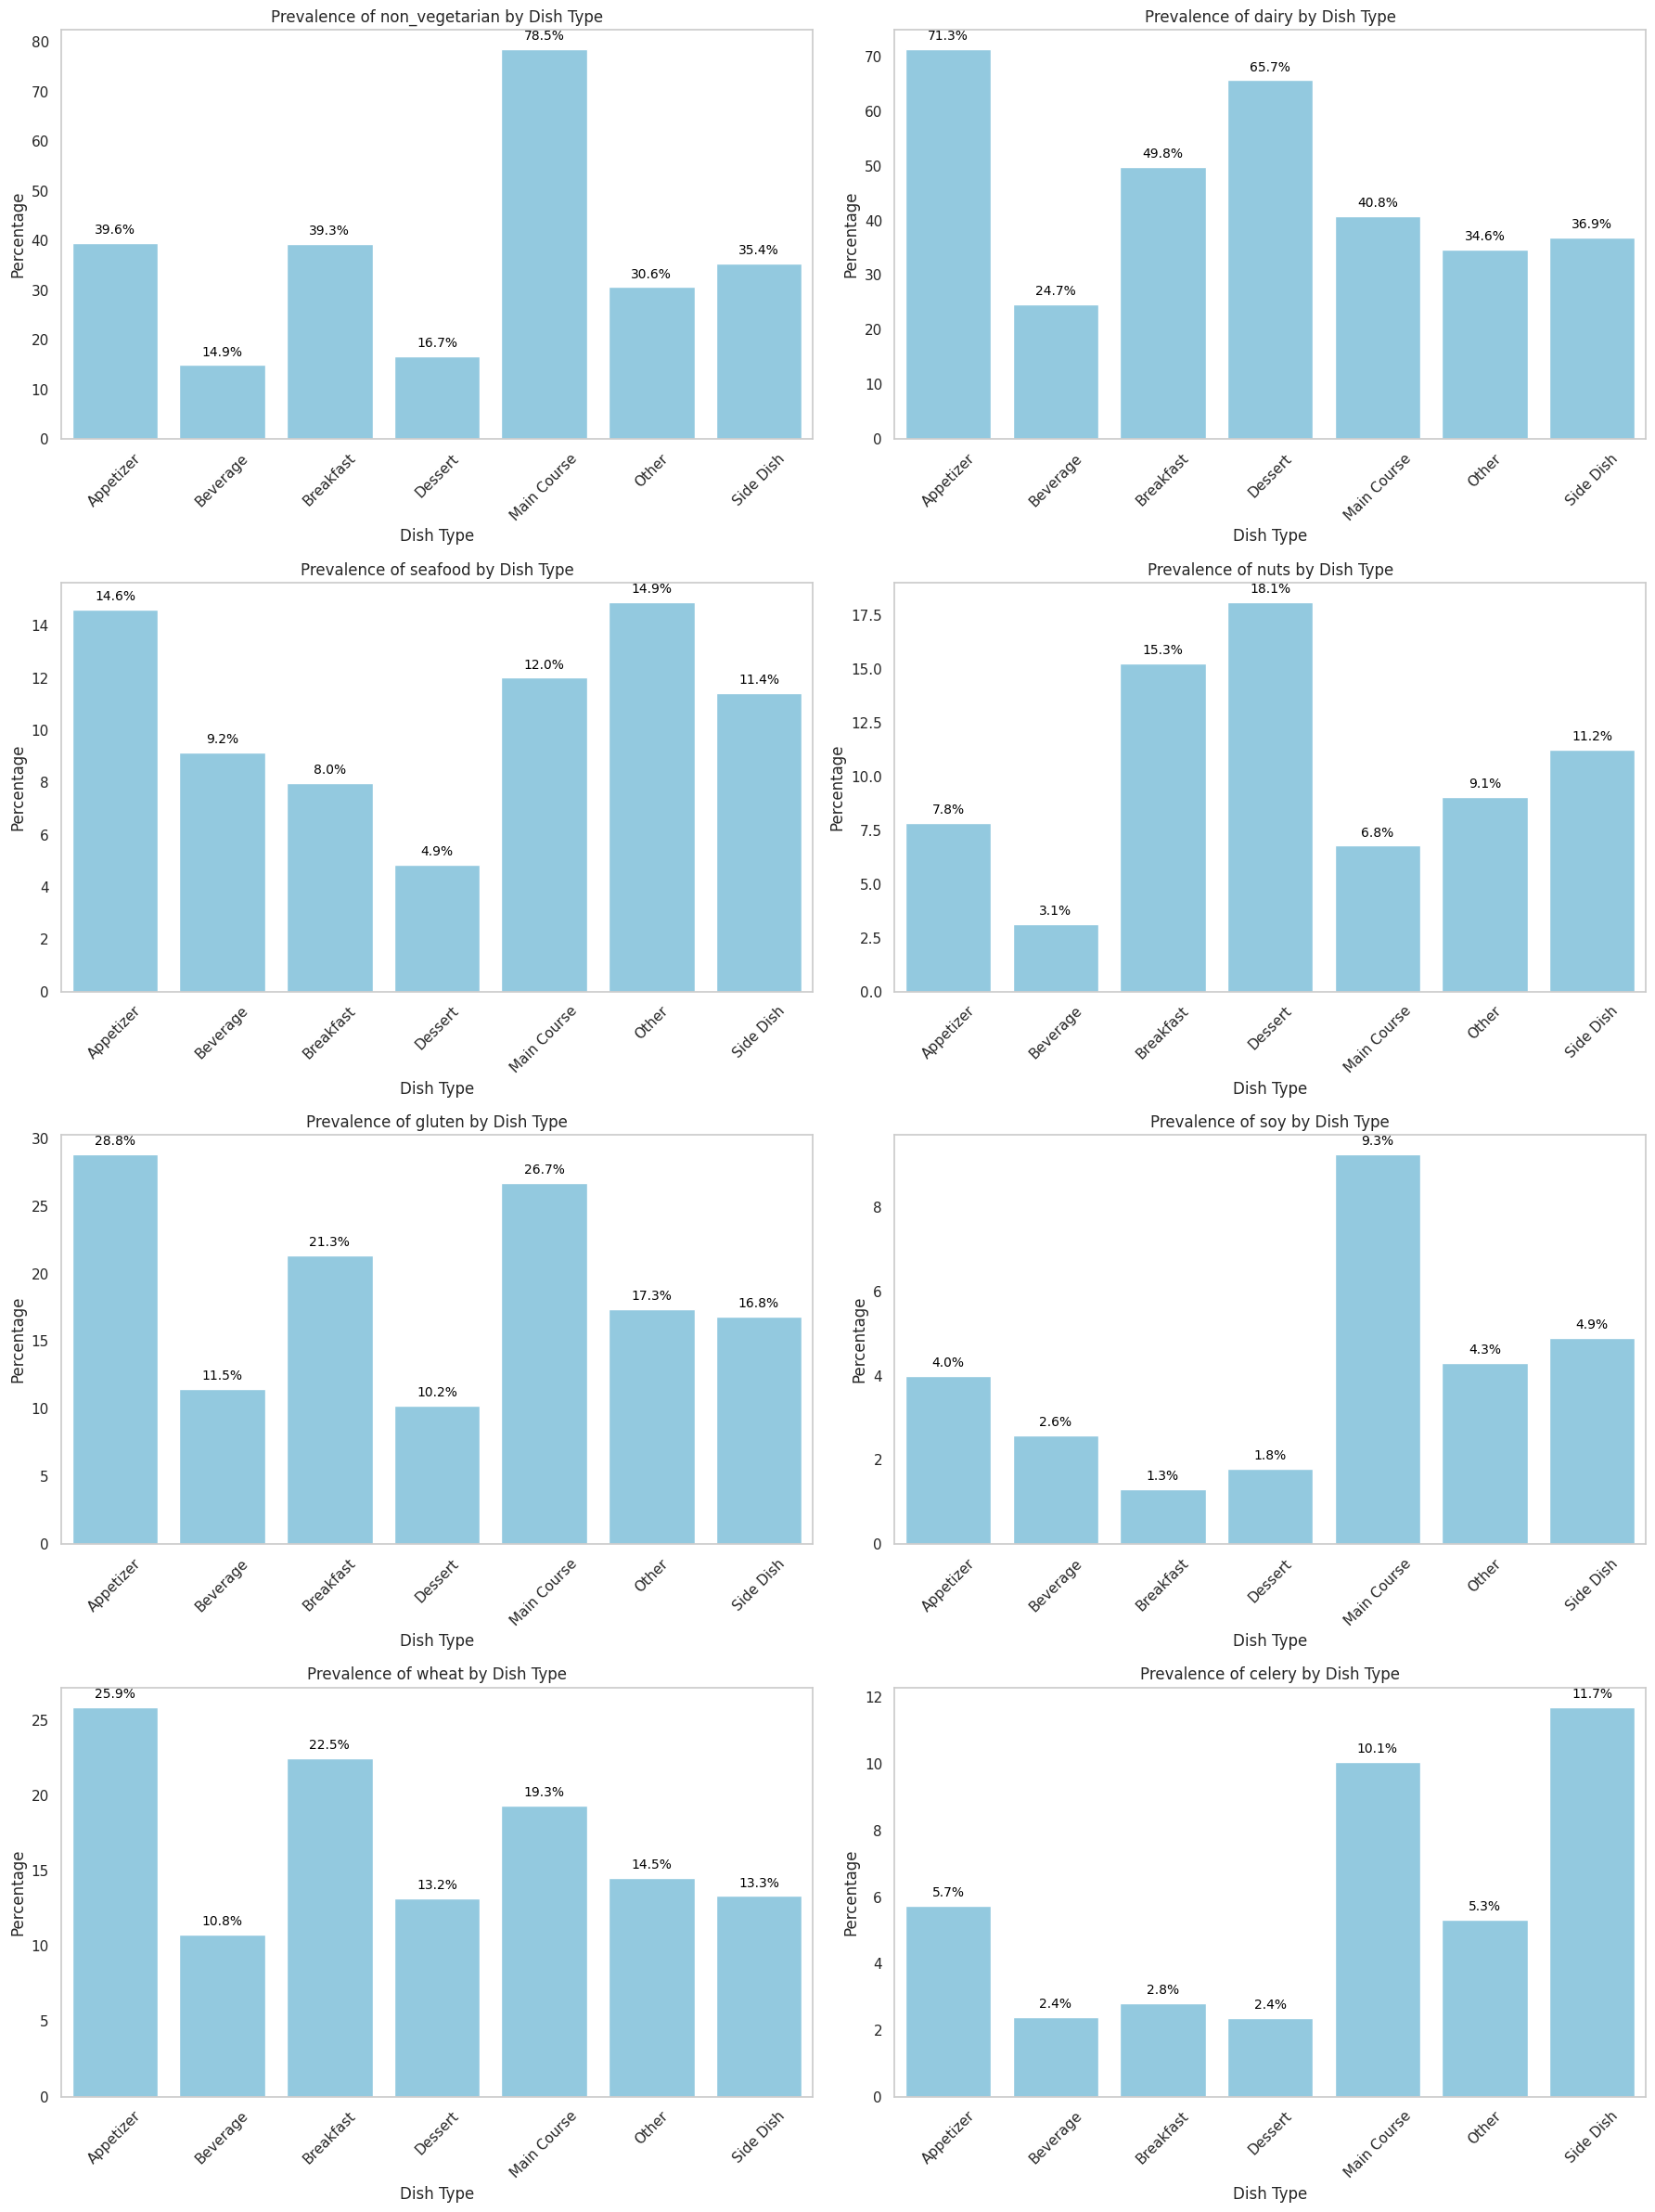

In [26]:
# Setting the aesthetic style of the plots
sns.set(style="whitegrid")

# Setting the grid to be displayed only vertically
sns.set_style("whitegrid", {'axes.grid' : False, 'grid.linestyle': '--'})

# Creating a bar plot for each allergen
fig, axes = plt.subplots(4, 2, figsize=(18, 24))  # Adjust the size and layout as necessary
axes = axes.flatten()

allergens = ['non_vegetarian', 'dairy', 'seafood', 'nuts', 'gluten', 'soy', 'wheat', 'celery']

for i, allergen in enumerate(allergens):
    ax = sns.barplot(x=allergen_counts_by_dish_type.index, y=allergen, data=allergen_counts_by_dish_type, ax=axes[i], color='skyblue')
    ax.set_title(f'Prevalence of {allergen} by Dish Type')
    ax.set_ylabel('Percentage')
    ax.set_xlabel('Dish Type')
    for item in ax.get_xticklabels():
        item.set_rotation(45)  # Rotate the x labels for better readability

    # Adding text labels on top of each bar
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=10, color='black', rotation=0, xytext=(0, 10),
                    textcoords='offset points')  # Adjust text position and format as needed

plt.tight_layout()
plt.show()
